In [24]:
import pandas
import numpy

from matplotlib import pyplot as plt

fn1 = "/home/reimann/Documents/data/THNCX/M7_validation/layer_profiles_M7_pre_exc_update.pkl"
fn2 = fn1#""

data1 = pandas.read_pickle(fn1)
data2 = pandas.read_pickle(fn2)

cols1 = data1.columns.levels[0].values
cols2 = data2.columns.levels[0].values
cols = numpy.intersect1d(cols1, cols2)
nx = int(numpy.sqrt(len(cols)))
ny = int(numpy.ceil(len(cols) / nx))


data1.columns = data1.columns.swaplevel(0, 1)
data2.columns = data2.columns.swaplevel(0, 1)

display(data1)

region,ACAd,ACAv,AId,AIp,AIv,AUDd,AUDp,AUDpo,AUDv,ECT,...,VISa,VISal,VISam,VISl,VISli,VISp,VISpl,VISpm,VISpor,VISrl
type,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,L2_TPC:B,...,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3920.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


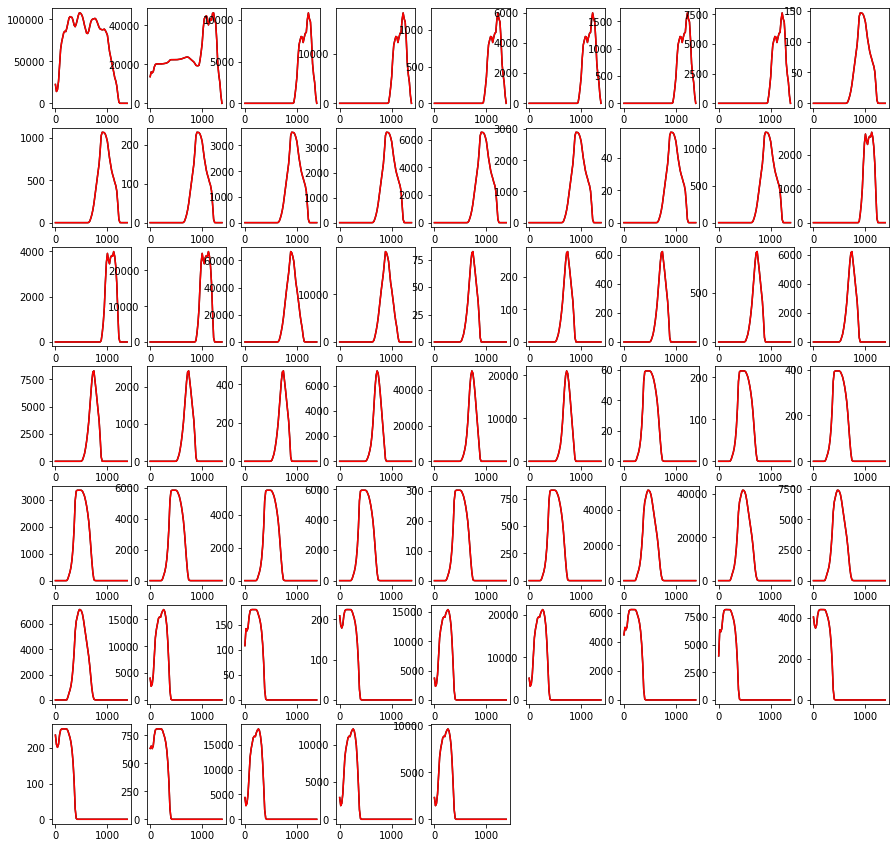

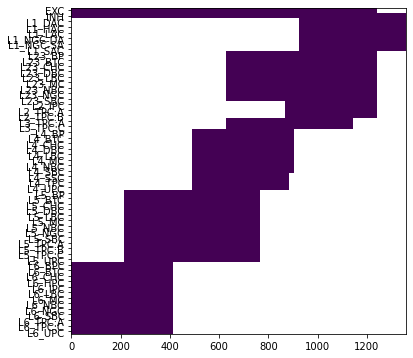

In [32]:
def compare_in_region(reg_name):
    sub1 = data1[reg_name]
    sub2 = data2[reg_name]
    fig1 = plt.figure(figsize=(15, 15))
    fig2 = plt.figure(figsize=(6, 6))
    ax2 = fig2.gca()
    diff_profiles = []; diff_labels = []
    for i, col in enumerate(cols):
        ax1 = fig1.add_subplot(nx, ny, i + 1)
        ax1.plot(sub1[col], color='black')
        ax1.plot(sub2[col], color='red')
        diff_profiles.append(((sub1[col] - sub2[col]) / (sub1[col] + sub2[col])).values)
        diff_labels.append(col)
    
    img = numpy.vstack(diff_profiles)
    valid = numpy.any(~numpy.isnan(img), axis=0)
    extent = (sub1.index[valid][0], sub1.index[valid][-1])
    ax2.imshow(img[:, valid],
               aspect="auto",
              extent=(extent[0], extent[1], len(diff_labels) - 0.5, -0.5))
    ax2.set_yticks(range(len(diff_labels)))
    ax2.set_yticklabels(diff_labels)
    

compare_in_region("SSp-ll")